# Lesson - 2 DataSets and DataLoader

- Pytorch provides a decoupled way to process and load data to main code modularity and better readability.

- Load pre-loaded datasets or you own dataset using two primitives : `torch.utils.data.DataLoader` & `torch.utils.data.Dataset`.

- **Dataset** stores the `samples` and their corresponding `labels` and **DataLoader** wraps a iterable around it **Dataset**.

## 1. `Loading a Dataset`

In [2]:
# Libraries
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 2. `Iterating & Visualizing the Dataset` 

> index `Datasets` maually like a list: `training_data[index]`.

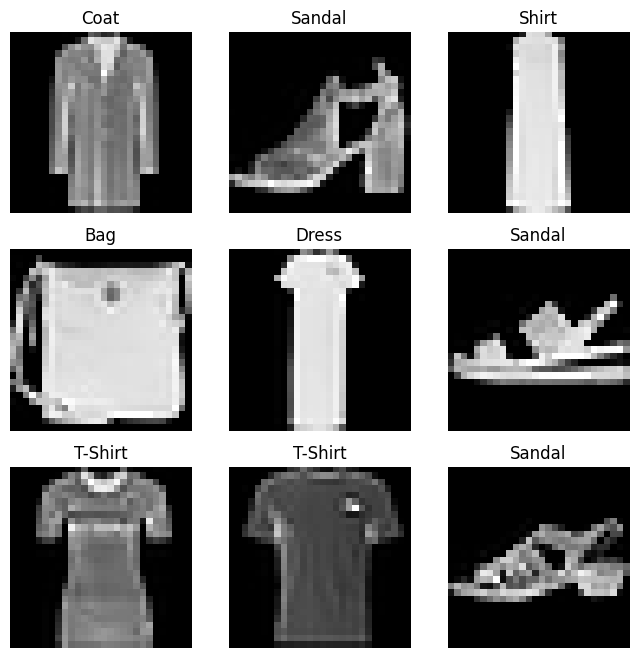

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 3. `Creating a Custom Dataset from your files`

- custom dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. 

In [8]:
import os 
import pandas as pd 
from torchvision.io import read_image

In [10]:
class CustomeImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __get__item(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            label = self.target_transform(label)
        return image, label

## 4. `Preparing data for training with DataLoader`

In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## 5. `Iterate through the DataLoader`

- `DataLoader` can iterate through the dataset as needed

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


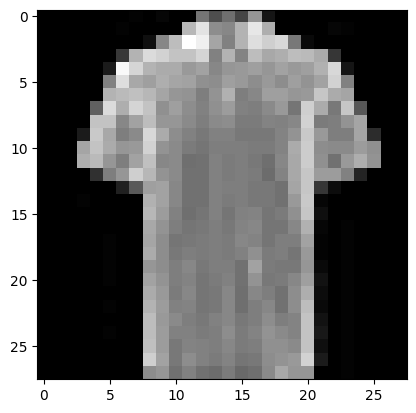

Label: 6


In [14]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Learnings :

1. What is __PyTorch's__ `Dataset` and `DataLoader`
2. how to load pre-loaded datasets for training and testing.
3. how to iterate through the dataset.
4. how to create your own custom dataset.
5. how to prepare you data for training and testing with `DataLoader`.
6. Iterating through the `DataLoader`.